In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings(action="ignore")

In [19]:
df = pd.read_csv("heart.csv")
df.tail(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


In [5]:
df.shape

(303, 14)

In [6]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


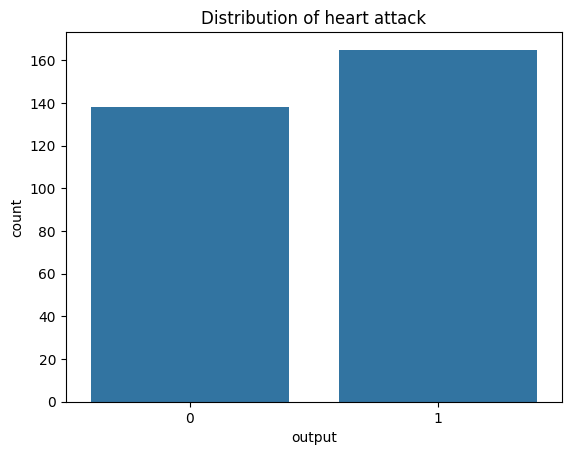

In [7]:
sns.countplot(data=df, x="output")
plt.title("Distribution of heart attack")
plt.show()

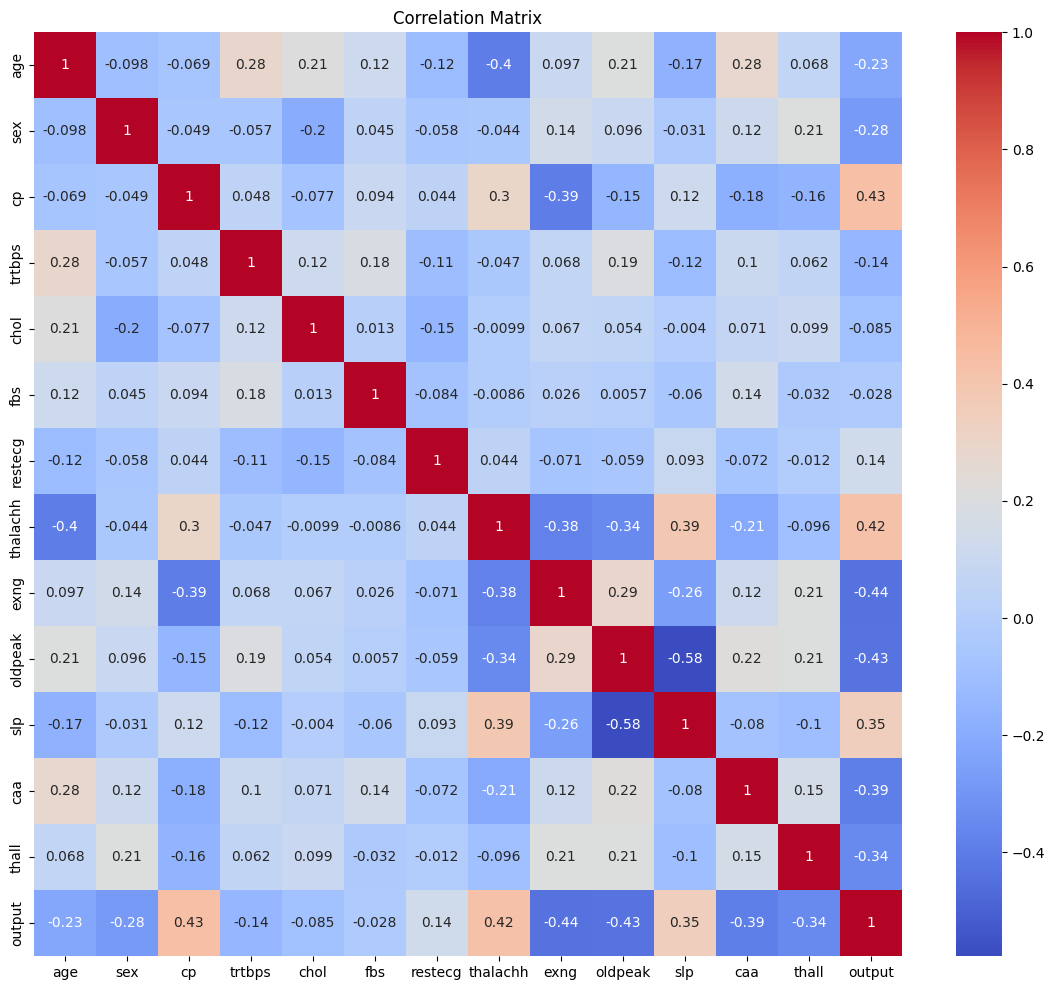

In [8]:
plt.figure(figsize=(14,12))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [9]:
X = df.drop("output", axis=1)
y = df["output"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
}

for name, model in models.items():
    print(f"Training {name}...")
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {np.round(accuracy,2)}")
    print(classification_report(y_test, y_pred))


Training Decision Tree...
Decision Tree Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.79      0.93      0.86        29
           1       0.93      0.78      0.85        32

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61

Training Random Forest...
Random Forest Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Training SVM...
SVM Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                         

In [13]:
for name, model in models.items():
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} accuracy: {np.round(accuracy,2)}")

Decision Tree accuracy: 0.85
Random Forest accuracy: 0.85
SVM accuracy: 0.87


In [14]:
import pickle
all_models = [DecisionTreeClassifier(),RandomForestClassifier(),SVC()]
with open("models.pkl",'wb') as files:
    pickle.dump(all_models,files)
print("Done")

Done


In [17]:
open_file = open("models.pkl","rb")
loaded_list = pickle.load(open_file)
print(loaded_list)
open_file.close()
print("Done")

[DecisionTreeClassifier(), RandomForestClassifier(), SVC()]
Done


In [ ]:
from flask import Flask, render_template, request
import pickle

app = Flask(__name__)

with open("model.pkl", 'rb') as file:
    trained_models = pickle.load(file)


def predict_heart_disease(features, model_name):
    model_to_use = trained_models[model_name]
    prediction = model_to_use.predict(features)
    return prediction[0]

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    # Get user input from the form
    age = int(request.form['age'])
    sex = int(request.form['sex'])
    cp = int(request.form['cp'])
    trtbps = int(request.form['trtbps'])
    chol = int(request.form['chol'])
    fbs = int(request.form['fbs'])
    restecg = int(request.form['restecg'])
    thalachh = int(request.form['thalachh'])
    exng = int(request.form['exng'])
    oldpeak = float(request.form['oldpeak'])
    slp = int(request.form['slp'])
    caa = int(request.form['caa'])
    thall = int(request.form['thall'])

    features = [[age, sex, cp, trtbps, chol, fbs, restecg, thalachh, exng, oldpeak, slp, caa, thall]]

    prediction = predict_heart_disease(features, "SVM")

    return render_template('result.html', prediction=prediction)

if __name__ == '__main__':
    app.run(debug=True)
